# Preprocessing

#### Wczytanie i wstępna wizualizacja danych

In [306]:
data = read.csv("day.csv")
head(data)

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600
6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606


In [297]:
summary(data)

    instant             dteday        season            yr        
 Min.   :  1.0   2011-01-01:  1   Min.   :1.000   Min.   :0.0000  
 1st Qu.:183.5   2011-01-02:  1   1st Qu.:2.000   1st Qu.:0.0000  
 Median :366.0   2011-01-03:  1   Median :3.000   Median :1.0000  
 Mean   :366.0   2011-01-04:  1   Mean   :2.497   Mean   :0.5007  
 3rd Qu.:548.5   2011-01-05:  1   3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :731.0   2011-01-06:  1   Max.   :4.000   Max.   :1.0000  
                 (Other)   :725                                   
      mnth          holiday           weekday        workingday   
 Min.   : 1.00   Min.   :0.00000   Min.   :0.000   Min.   :0.000  
 1st Qu.: 4.00   1st Qu.:0.00000   1st Qu.:1.000   1st Qu.:0.000  
 Median : 7.00   Median :0.00000   Median :3.000   Median :1.000  
 Mean   : 6.52   Mean   :0.02873   Mean   :2.997   Mean   :0.684  
 3rd Qu.:10.00   3rd Qu.:0.00000   3rd Qu.:5.000   3rd Qu.:1.000  
 Max.   :12.00   Max.   :1.00000   Max.   :6.000   Max.   :1.0

In [388]:
keeps <- c("atemp", "temp", "hum", "windspeed", "registered", "casual", "cnt", "season")
df = data[keeps]
head(df)

atemp,temp,hum,windspeed,registered,casual,cnt,season
0.363625,0.344167,0.805833,0.1604460,654,331,985,1
0.353739,0.363478,0.696087,0.2485390,670,131,801,1
0.189405,0.196364,0.437273,0.2483090,1229,120,1349,1
0.212122,0.200000,0.590435,0.1602960,1454,108,1562,1
0.229270,0.226957,0.436957,0.1869000,1518,82,1600,1
0.233209,0.204348,0.518261,0.0895652,1518,88,1606,1


### Wstępny model


Call:
lm(formula = df$cnt ~ df$hum + df$windspeed + df$registered + 
    df$temp + df$atemp)

Residuals:
    Min      1Q  Median      3Q     Max 
-1062.4  -336.1  -160.2   132.4  2297.6 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    409.02802  150.54353   2.717  0.00674 ** 
df$hum        -780.96262  156.05786  -5.004 7.04e-07 ***
df$windspeed  -920.56777  290.11522  -3.173  0.00157 ** 
df$registered    1.03746    0.01652  62.795  < 2e-16 ***
df$temp       1020.25505  900.17872   1.133  0.25742    
df$atemp       974.96469 1018.42977   0.957  0.33872    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 560.9 on 725 degrees of freedom
Multiple R-squared:  0.9167,	Adjusted R-squared:  0.9162 
F-statistic:  1596 on 5 and 725 DF,  p-value: < 2.2e-16


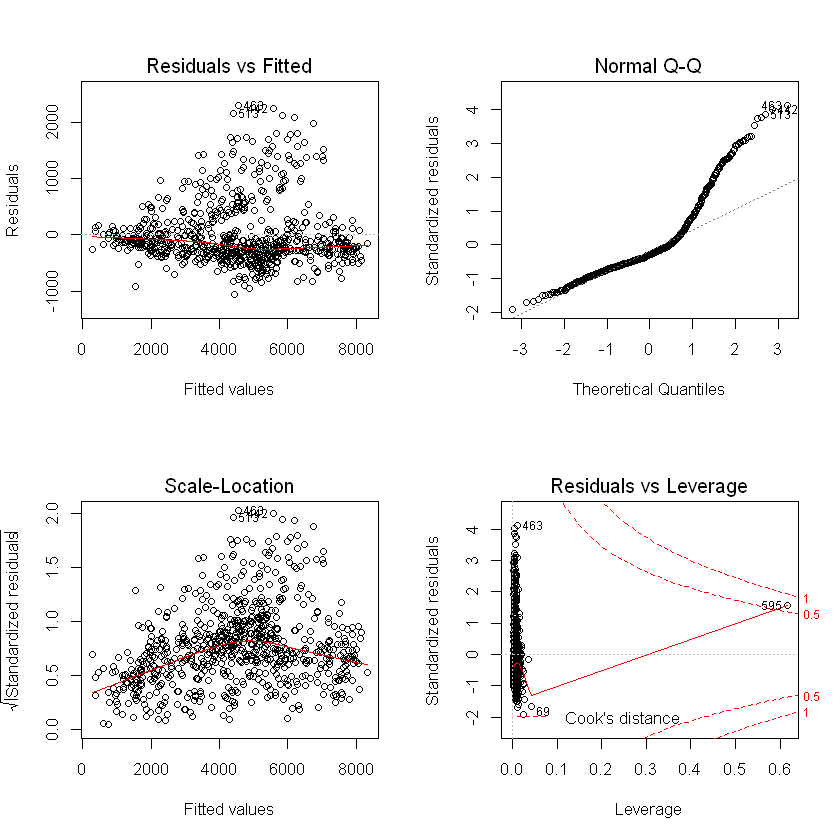

In [389]:
model <- lm(df$cnt~df$hum + df$windspeed + df$registered + df$temp + df$atemp)
summary(model)
par(mfrow=c(2, 2))
plot(model)

### Metoda forward

In [390]:
model.forward <- step(model, direction="forward", trace=1, scope= ~df$temp + df$atemp + df$hum + df$windspeed + df$registered)

Start:  AIC=9259.87
df$cnt ~ df$hum + df$windspeed + df$registered + df$temp + df$atemp



### Metoda backward

In [391]:
model.backward <- step(model, direction="backward", trace=1, scope= ~df$temp + df$atemp + df$hum + df$windspeed + df$registered)

Start:  AIC=9259.87
df$cnt ~ df$hum + df$windspeed + df$registered + df$temp + df$atemp

                Df  Sum of Sq        RSS     AIC
- df$atemp       1     288367  228410863  9258.8
- df$temp        1     404194  228526690  9259.2
<none>                         228122496  9259.9
- df$windspeed   1    3168113  231290609  9267.9
- df$hum         1    7879875  236002371  9282.7
- df$registered  1 1240728405 1468850901 10619.2

Step:  AIC=9258.79
df$cnt ~ df$hum + df$windspeed + df$registered + df$temp

                Df  Sum of Sq        RSS     AIC
<none>                         228410863  9258.8
- df$windspeed   1    3627051  232037914  9268.3
- df$hum         1    7693854  236104717  9281.0
- df$temp        1   58026282  286437145  9422.3
- df$registered  1 1248486338 1476897201 10621.2


Odrzucamy zmienną atemp

## DFFITS

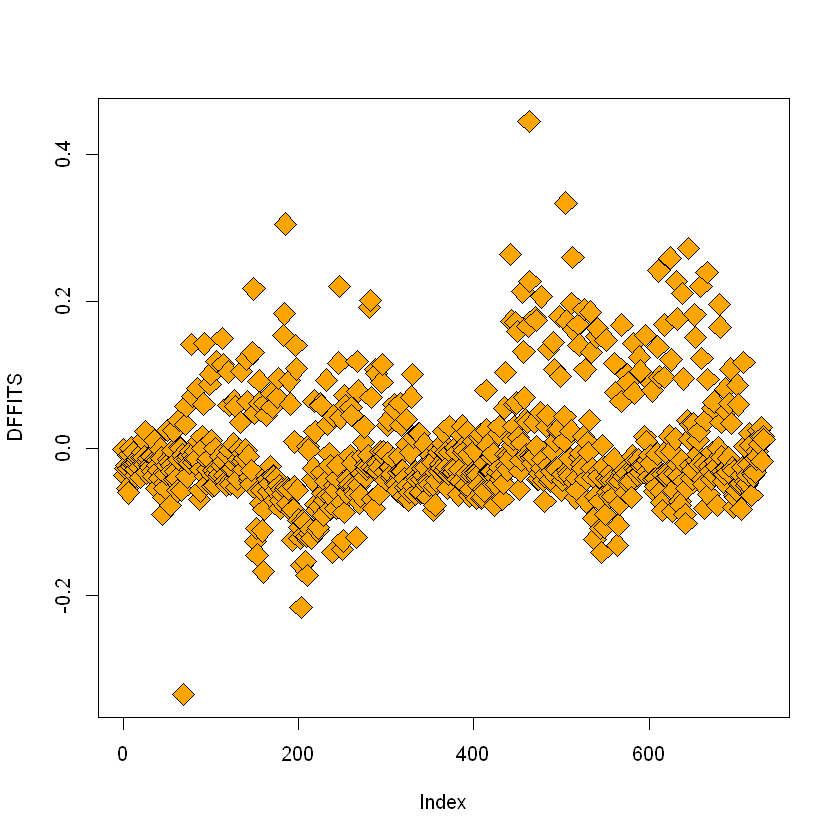

In [392]:
model <- lm(df$cnt~df$hum + df$windspeed + df$registered + df$temp)
plot(dffits(model), pch=23, bg='orange', cex=2, ylab="DFFITS")

wybranie rekordów z wiekszym od progu

In [393]:
x_dffits <- df
x_dffits <- x_dffits[which(abs(dffits(model)) < 0.2),]

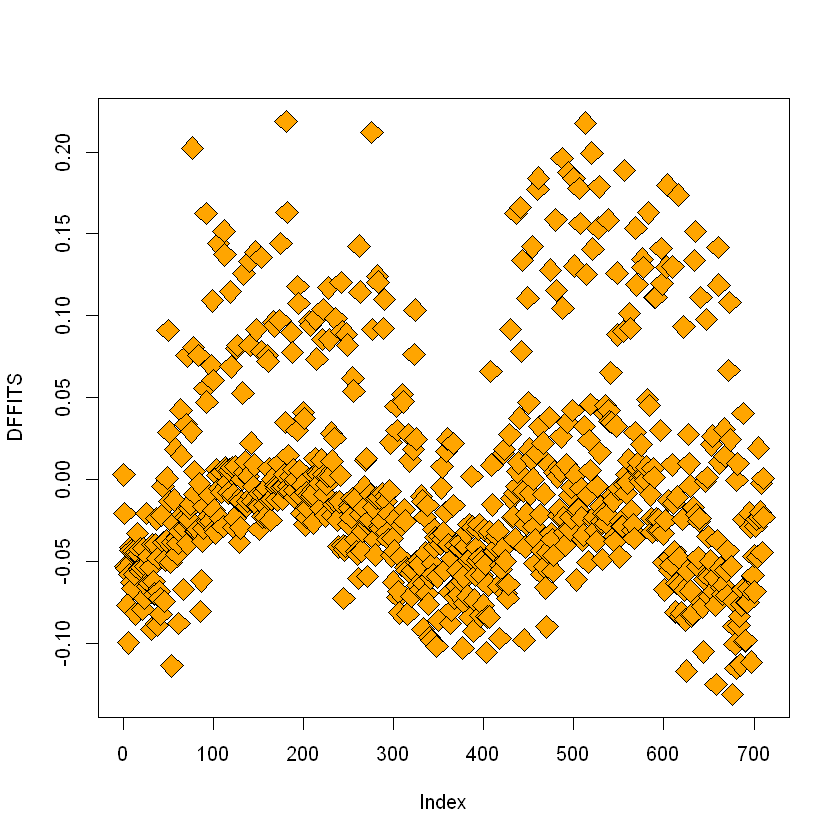

In [394]:
model <- lm(x_dffits$cnt~x_dffits$hum + x_dffits$windspeed + x_dffits$registered)
plot(dffits(model), pch=23, bg='orange', cex=2, ylab="DFFITS")

In [395]:
removed_rate <- 100 * (1 - (nrow(x_dffits) / nrow(df)))

print(removed_rate)

[1] 2.735978


## Normalizacja

#### Normalizacja

In [398]:
x <- x_dffits
normalized = (x-min(x))/(max(x)-min(x))
normalized$cnt = x_dffits$cnt
normalized$season = x_dffits$season
head(normalized)

atemp,temp,hum,windspeed,registered,casual,cnt,season
4.080773e-05,3.848077e-05,9.369091e-05,1.650977e-05,0.07820849,0.039581260,985,1
3.962547e-05,4.079015e-05,8.056650e-05,2.704471e-05,0.08012191,0.015663473,801,1
1.997294e-05,2.080516e-05,4.961521e-05,2.701721e-05,0.14697212,0.014347994,1349,1
2.268964e-05,2.123999e-05,6.793169e-05,1.649183e-05,0.17387963,0.012912927,1562,1
2.474036e-05,2.446375e-05,4.957742e-05,1.967337e-05,0.18153333,0.009803615,1600,1
2.521142e-05,2.175996e-05,5.930048e-05,8.033207e-06,0.18153333,0.010521149,1606,1


In [399]:
write.csv(normalized, file = "day_normalized.csv")

### Standaryzacja

In [406]:
library(psycho)
library(tidyverse)

stnd <- x %>% 
  psycho::standardize() 

stnd$cnt = x$cnt
stnd$season = x$season
summary(stnd)

     atemp               temp               hum             windspeed      
 Min.   :-2.40000   Min.   :-2.35717   Min.   :-3.14602   Min.   :-2.1680  
 1st Qu.:-0.85665   1st Qu.:-0.87159   1st Qu.:-0.77700   1st Qu.:-0.7157  
 Median : 0.02863   Median :-0.02022   Median :-0.02497   Median :-0.1380  
 Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.83089   3rd Qu.: 0.88097   3rd Qu.: 0.72259   3rd Qu.: 0.5465  
 Max.   : 2.16505   Max.   : 2.00406   Max.   : 2.45106   Max.   : 4.0906  
   registered            casual             cnt           season     
 Min.   :-2.319275   Min.   :-1.2888   Min.   :  22   Min.   :1.000  
 1st Qu.:-0.743841   1st Qu.:-0.7928   1st Qu.:3116   1st Qu.:1.000  
 Median : 0.007933   Median :-0.1710   Median :4486   Median :2.000  
 Mean   : 0.000000   Mean   : 0.0000   Mean   :4451   Mean   :2.491  
 3rd Qu.: 0.701878   3rd Qu.: 0.4169   3rd Qu.:5858   3rd Qu.:3.000  
 Max.   : 2.106382   Max.   : 3.4871   Max.   :8

In [407]:
head(stnd)

atemp,temp,hum,windspeed,registered,casual,cnt,season
-0.6617326,-0.8081916,1.2620853,-0.38675503,-1.914154,-0.7581497,985,1
-0.7221234,-0.7032498,0.4791771,0.74986054,-1.903931,-1.0807337,801,1
-1.7259935,-1.6113971,-1.3671553,0.74689298,-1.546734,-1.0984758,1349,1
-1.5872218,-1.5916380,-0.2745252,-0.38869040,-1.402961,-1.1178309,1562,1
-1.4824695,-1.4451456,-1.3694096,-0.04543361,-1.362066,-1.1597668,1600,1
-1.4584072,-1.5680097,-0.7894015,-1.30129105,-1.362066,-1.1500893,1606,1


In [405]:
write.csv(stnd, file = "day_stnd.csv")

## Macierz korelacji

In [408]:
cor(normalized)

,atemp,temp,hum,windspeed,registered,casual,cnt,season
atemp,1.0000000,0.9916682,0.13797521,-0.1823593,0.5541538,0.57702639,0.6417150,0.3435795
temp,0.9916682,1.0000000,0.12349496,-0.1558940,0.5498348,0.57750573,0.6383299,0.3351194
hum,0.1379752,0.1234950,1.00000000,-0.2471660,-0.1036976,-0.09054085,-0.1144194,0.2032142
windspeed,-0.1823593,-0.1558940,-0.24716599,1.0000000,-0.2255897,-0.18878739,-0.2462578,-0.2311179
registered,0.5541538,0.5498348,-0.10369756,-0.2255897,1.0000000,0.41765571,0.9554653,0.4099947
casual,0.5770264,0.5775057,-0.09054085,-0.1887874,0.4176557,1.00000000,0.6671881,0.2187453
cnt,0.6417150,0.6383299,-0.11441944,-0.2462578,0.9554653,0.66718805,1.0000000,0.4071659
season,0.3435795,0.3351194,0.20321419,-0.2311179,0.4099947,0.21874531,0.4071659,1.0000000


## Histogramy dla wartości znormalizowanych

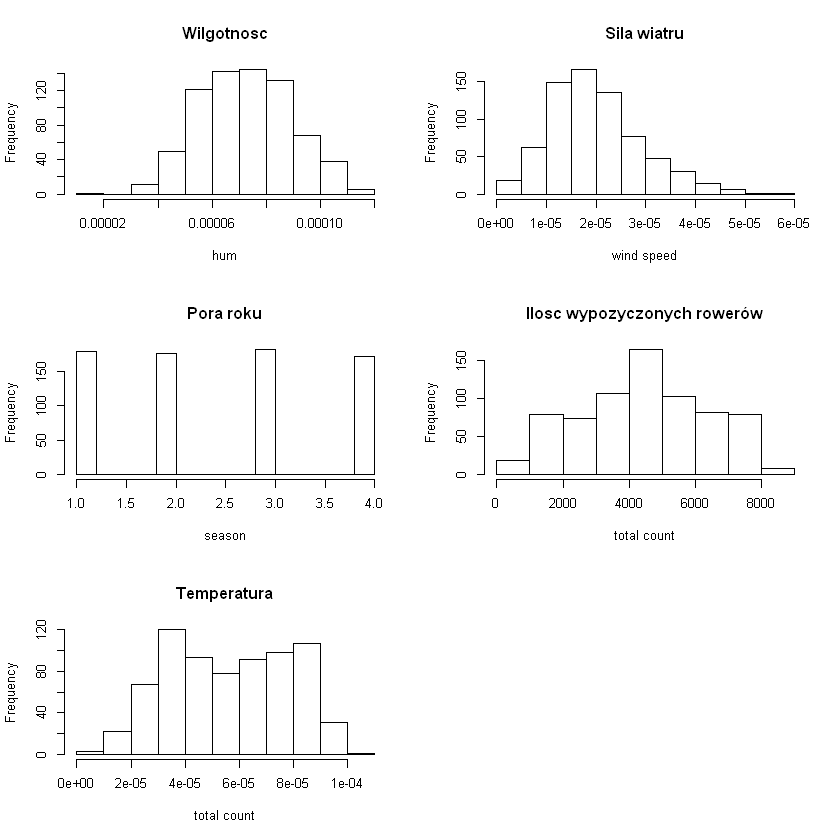

In [411]:
par(mfrow = c(3,2))

hist(normalized$hum, xlab = 'hum', main = 'Wilgotność')
hist(normalized$windspeed, xlab = 'wind speed', main = 'Siła wiatru')
hist(normalized$season, xlab = 'season',main = 'Pora roku')
hist(normalized$cnt, xlab = 'total count', main = 'Ilość wypożyczonych rowerów')
hist(normalized$temp, xlab = 'total count', main = 'Temperatura')

## Histogramy dla standaryzacji

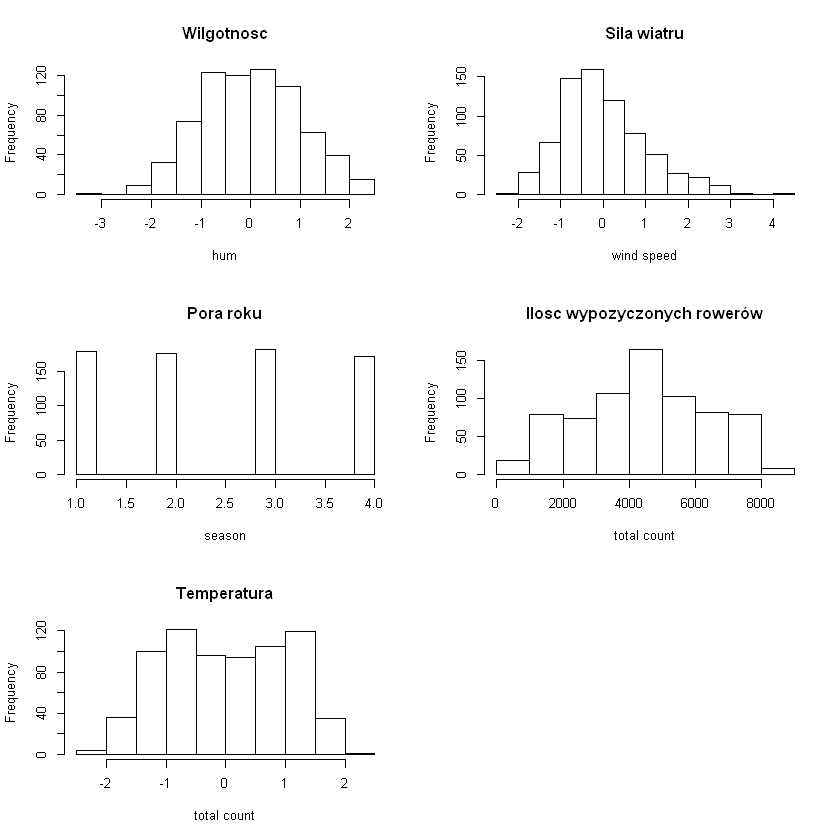

In [410]:
par(mfrow = c(3,2))

hist(stnd$hum, xlab = 'hum', main = 'Wilgotność')
hist(stnd$windspeed, xlab = 'wind speed', main = 'Siła wiatru')
hist(stnd$season, xlab = 'season',main = 'Pora roku')
hist(stnd$cnt, xlab = 'total count', main = 'Ilość wypożyczonych rowerów')
hist(stnd$temp, xlab = 'total count', main = 'Temperatura')

## Dodaje kolumnę z procentowym udziałem zarejestrowanych userów w całości cnt wypozyczonych rowerow

In [430]:
data_to_add_column <- normalized

data_p <- data.frame(data_to_add_column, 'registered' = (data_to_add_column$registered / data_to_add_column$cnt))
keeps <- c("hum", "windspeed", "registered", "cnt", "season", "temp")
data_p = data_p[keeps]
head(data_p)

hum,windspeed,registered,cnt,season,temp
9.369091e-05,1.650977e-05,0.07820849,985,1,3.848077e-05
8.056650e-05,2.704471e-05,0.08012191,801,1,4.079015e-05
4.961521e-05,2.701721e-05,0.14697212,1349,1,2.080516e-05
6.793169e-05,1.649183e-05,0.17387963,1562,1,2.123999e-05
4.957742e-05,1.967337e-05,0.18153333,1600,1,2.446375e-05
5.930048e-05,8.033207e-06,0.18153333,1606,1,2.175996e-05


In [431]:
write.csv(data_p, file = "day_with_registered_percent")

## Wartości odstające

,hum,windspeed,registered,cnt,season,temp
726,9.578372e-05,3.517760e-05,0.05165974,441,1,2.642213e-05
727,7.540385e-05,3.919423e-05,0.22326986,2114,1,2.771776e-05
728,6.787967e-05,1.591481e-05,0.29310980,3095,1,2.761802e-05
729,8.736274e-05,1.219703e-05,0.14135144,1341,1,2.761802e-05
730,5.512348e-05,3.926850e-05,0.17124868,1796,1,2.791700e-05
731,6.638481e-05,1.584007e-05,0.27385598,2729,1,2.313344e-05


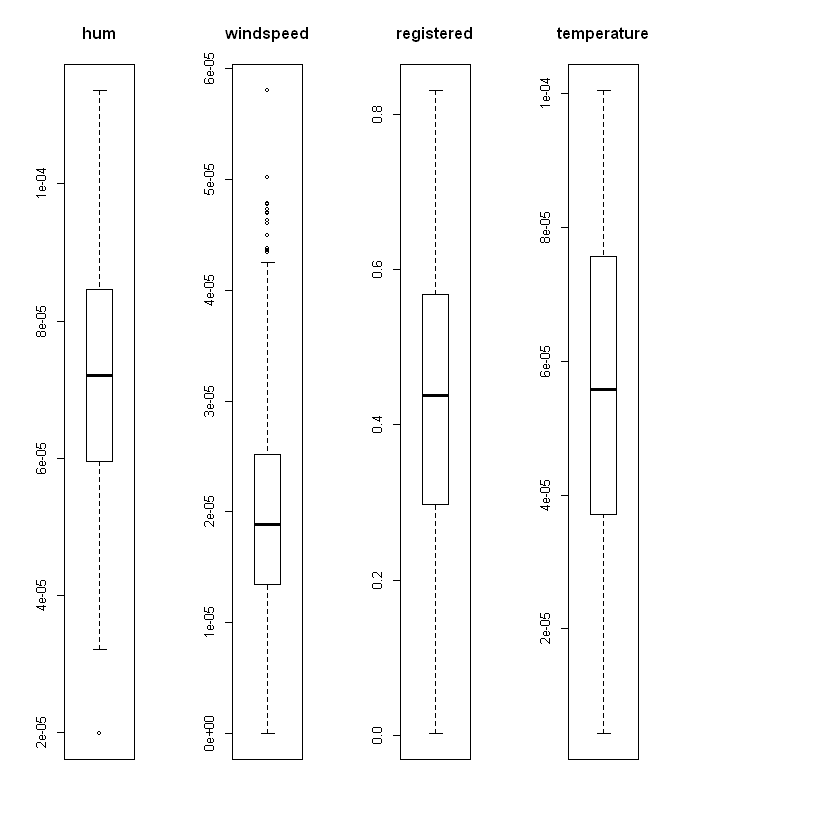

In [432]:
data_to_draw <- data_p

par(mfrow=c(1, 5))

boxplot(data_to_draw$hum, main="hum")
boxplot(data_to_draw$windspeed, main="windspeed")
boxplot(data_to_draw$registered, main="registered")
boxplot(data_to_draw$temp, main="temperature")
tail(data_p)

In [433]:
write.csv(data_p, file = "day_final")

### Ostateczny model


Call:
lm(formula = normalized$cnt ~ normalized$hum + normalized$windspeed + 
    normalized$registered + normalized$temp)

Residuals:
   Min     1Q Median     3Q    Max 
-895.6 -293.3 -139.5  126.2 1859.9 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)                511.6      123.6   4.139 3.90e-05 ***
normalized$hum        -6760352.9  1171781.2  -5.769 1.19e-08 ***
normalized$windspeed  -8938539.3  2113596.8  -4.229 2.66e-05 ***
normalized$registered     8599.7      123.1  69.882  < 2e-16 ***
normalized$temp       15207773.6  1021405.3  14.889  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 488.2 on 706 degrees of freedom
Multiple R-squared:  0.935,	Adjusted R-squared:  0.9346 
F-statistic:  2537 on 4 and 706 DF,  p-value: < 2.2e-16


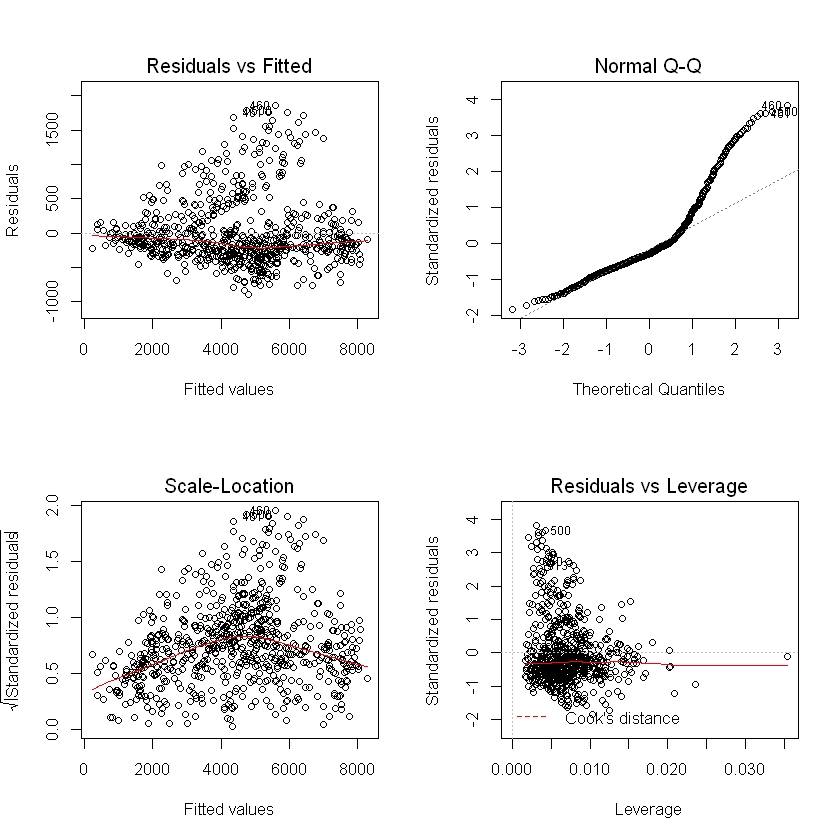

In [428]:
model <- lm(data_p$cnt~normalized$hum + data_p$windspeed + normalized$registered + normalized$temp)
summary(model)
par(mfrow=c(2, 2))
plot(model)